In [1]:
import numpy as np

In [2]:
X = np.array([1,2,3,4,5])
X.shape

(5,)

In [3]:
y = np.array([3,4,2,4,5])

In [4]:
import matplotlib.pyplot as plt

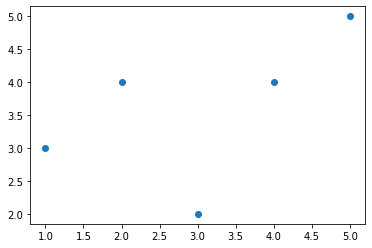

In [5]:
plt.scatter(X,y)

# Linear Regression: fit a line through this data and plot the result

# Single variable y = ax+b

In [6]:
# Initialize
a = 0
b = 0
yp = 0
lr = 0.01
epochs = 15

0.23200000000000004 0.07200000000000001
0.40864 0.12864000000000003
0.5430208 0.17354880000000003
0.645143296 0.20949657600000005
0.72264197632 0.23859804672000004
0.7813448587264 0.2624675672064
0.825700935774208 0.28233752433868803
0.8591064784435609 0.2991487177054618
0.8841541301236499 0.3136193546447389
0.9028230602177626 0.3262977197444251
0.9166241237851893 0.33760238173647084
0.9267106736482594 0.34785288667463005
0.9339631522451646 0.3572931885222419
0.9390536674398938 0.3661095356170872
0.942495288466092 0.3744441248583518
7.374105786561548


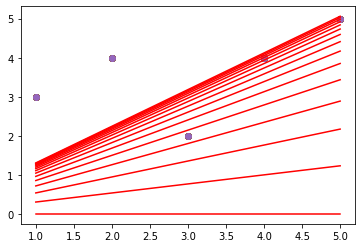

In [7]:
for i in range(epochs):
    yp = a*X+b
    da = (-2/len(X))*np.sum((y-yp)*X)
    db = (-2/len(X))*np.sum(y-yp)
    a = a - lr*da
    b = b - lr*db
    plt.scatter(X,y)
    plt.plot([min(X),max(X)],[min(yp),max(yp)],color = 'red')
    #plt.show()
    print(a,b)
print(np.sum((y-yp)**2))

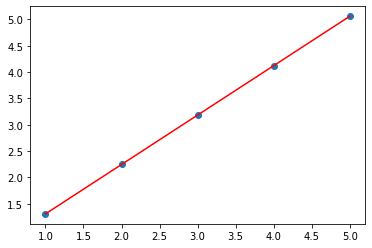

In [8]:
plt.scatter(X,yp)
plt.plot([min(X),max(y)],[min(yp),max(yp)],color = 'red')

# Lets do real Example: How to use Linear Regression using sklearn API

In [9]:
import pandas as pd

In [10]:
df_q = pd.read_csv('dataS.csv')

# Q_1: Apply linear regression on this data and find the best fitting line parameters a and b. Also compute the mse and show at what learning rate and number of epochs you get the lowest mse. 

In [11]:
df = pd.read_csv('datasets_13720_18513_insurance_MAIN.csv')

In [12]:
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df_num = pd.read_csv('datasets_13720_18513_insurance_1.csv')

In [16]:
df_num

,age,gender,bmi,children,smoker,region,charges
0,19,2,27.900,0,11,10,16884.92400
1,18,8,33.770,1,22,20,1725.55230
2,28,8,33.000,3,22,20,4449.46200
3,33,8,22.705,0,22,30,21984.47061
4,32,8,28.880,0,22,30,3866.85520
...,...,...,...,...,...,...,...
1333,50,8,30.970,3,22,30,10600.54830
1334,18,2,31.920,0,22,40,2205.98080
1335,18,2,36.850,0,22,20,1629.83350
1336,21,2,25.800,0,22,10,2007.94500


In [17]:
X = df_num[['age','gender','bmi','children','smoker','region']].values

In [18]:
X.shape

(1338, 6)

In [19]:
y = df_num['charges'].values

In [20]:
y.shape

(1338,)

# Split data into training and testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
y_predict = regressor.predict(X_test)

In [25]:
error = np.sum((y_test-y_predict)**2)

In [30]:
y_test.shape
y_predict.shape

(402,)

In [28]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_predict})
df_result

,Actual,Predicted
0,2395.17155,2026.089786
1,11286.53870,12050.784098
2,9617.66245,10492.132951
3,1719.43630,2493.021730
4,8891.13950,8319.412496
...,...,...
397,23288.92840,4158.753605
398,12479.70895,11431.257986
399,40103.89000,33228.937538
400,43578.93940,35935.918239


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4288.957513559822
Mean Squared Error: 38010670.32913278
Root Mean Squared Error: 6165.279420199281


# Lets test the model by asking some tough questions and give marks

In [33]:
print('Age of the Person being Insured')
X1 = input()
print('Age  ' + X1)
print('Gender of the Person being Insured')
X2 = input()
print('M?F  ' + X2)
print('BMI of the Person being Insured')
X3 = input()
print('bmi  ' + X3)
print('Number of childern for the person being Insured')
X4 = input()
print('Number of Childern  ' + X4)
print('Smoking Status of the Person being Insured')
X5 = input()
print('Y?N  ' + X5)
print('Region of the Person being Insured')
X6 = input()
print('Place  ' + X6)

Age of the Person being Insured
55
Age  55
Gender of the Person being Insured
2
M?F  2
BMI of the Person being Insured
24
bmi  24
Number of childern for the person being Insured
2
Number of Childern  2
Smoking Status of the Person being Insured
11
Y?N  11
Region of the Person being Insured
20
Place  20


In [38]:
X_in = np.array([[X1], [X2], [X3], [X4], [X5],[X6]], dtype=float).T

In [39]:
X_in.shape

(1, 6)

In [40]:
Y_pred1 = regressor.predict(X_in)

In [41]:
Y_pred1

array([33788.85083661])

In [42]:
X_in

array([[55.,  2., 24.,  2., 11., 20.]])

# Q_2: Build a dataset of CGPA vs Package for the last year placements of KLU. Feed your CGPA and predict the package. 